<a href="https://colab.research.google.com/github/saurabhsingh1411/10_simple_project_data_science/blob/main/Stock%20Price%20Indicator/Stock_Price_Indicator_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
stock=pd.read_csv('TCS.csv')
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [7]:
corr=stock.corr()
corr

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.937777,0.925625,0.889651,0.886413,-0.145327,-0.091618
High,0.937777,1.000000,0.935803,0.946352,0.956137,-0.064046,-0.005265
Low,0.925625,0.935803,1.000000,0.964793,0.968353,-0.353678,-0.297565
Last,0.889651,0.946352,0.964793,1.000000,0.995482,-0.220357,-0.162985
Close,0.886413,0.956137,0.968353,0.995482,1.000000,-0.223675,-0.165647
Total Trade Quantity,-0.145327,-0.064046,-0.353678,-0.220357,-0.223675,1.000000,0.998061
Turnover (Lacs),-0.091618,-0.005265,-0.297565,-0.162985,-0.165647,0.998061,1.000000


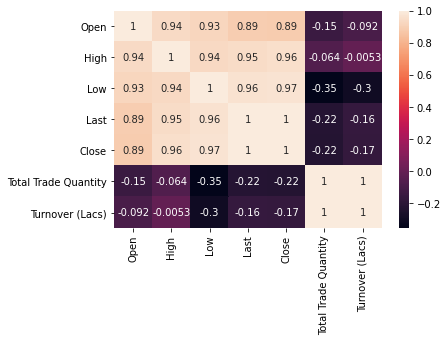

In [9]:
import seaborn as sns
sns.heatmap(corr,annot=True)

In [10]:
stock.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [13]:
features=['High','Low','Last','Close','Total Trade Quantity','Turnover (Lacs)']
X=stock[features]
y=stock['Open']

In [14]:
print(X.head(3))
print(y.head(3))

     High     Low     Last    Close  Total Trade Quantity  Turnover (Lacs)
0  1990.0  1968.3  1984.00  1982.40             1610576.0         31868.00
1  2019.4  1971.0  2009.85  2010.85             3270615.0         65568.23
2  2018.0  1985.0  2003.90  2006.75             2501539.0         50131.23
0    1984.0
1    1983.0
2    2006.0
Name: Open, dtype: float64


In [27]:
X.shape

(20, 6)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred=lr.predict(X_test)

In [19]:
lr.score(X_test,y_pred)

1.0

In [21]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
rms

15.090740734041804

In [22]:
print(y_test[0:5])

18    1915.0
1     1983.0
19    1908.0
8     2024.0
Name: Open, dtype: float64


In [24]:
print(y_pred[0:5])

[1903.67209051 1977.51631965 1888.7364764  2004.46935233]


In [26]:
y_test

18    1915.0
1     1983.0
19    1908.0
8     2024.0
Name: Open, dtype: float64